In [1]:
import numpy as np;
import tensorflow as tf;
from keras import layers, models;

In [3]:
training_data = np.array([[0,0], [0,1], [1,0], [1,1]], "float32");

target_data = np.array([[0],[1],[1],[0]], "float32");

In [25]:
model = models.Sequential();
model.add(layers.Dense(16, input_dim=2, activation='relu'));
model.add(layers.Dense(32, activation='relu'));
model.add(layers.Dense(1, activation='sigmoid'));

c:\Users\sergi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['binary_accuracy']);

Epoch 1/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 850ms/step - binary_accuracy: 0.5000 - loss: 0.2475
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - binary_accuracy: 0.2500 - loss: 0.2463
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - binary_accuracy: 0.2500 - loss: 0.2451
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - binary_accuracy: 0.2500 - loss: 0.2439
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - binary_accuracy: 0.2500 - loss: 0.2427
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - binary_accuracy: 0.2500 - loss: 0.2416
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - binary_accuracy: 0.2500 - loss: 0.2405
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - binary_accuracy: 0.5000 - loss: 0.2394
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - binary_accuracy: 0.5000 - loss: 0.2385
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - binary_accuracy: 0.5000 - loss: 0.2375
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - binary_accuracy: 0.5000 

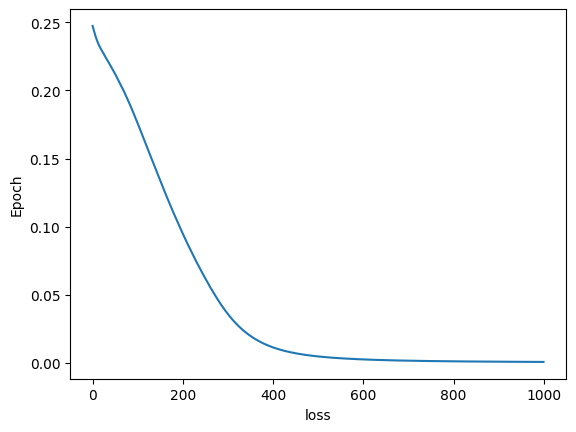

In [27]:
import matplotlib.pyplot as plt;

history = model.fit(training_data, target_data, epochs=1000);

plt.plot(history.history['loss']);
plt.xlabel("loss");
plt.ylabel("Epoch");

plt.show();

In [28]:
scores = model.evaluate(training_data, training_data);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - binary_accuracy: 0.5000 - loss: 0.4843


In [29]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100));
print(model.predict(np.array([[1,1]], "float32")).round());


compile_metrics: 50.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
[[0.]]


In [31]:
model_json = model.to_json();

with open("model.json", "w") as json_file:
    json_file.write(model_json);

model.save_weights("model.weights.h5");
print("Modelo guardado");

Modelo guardado
